In [1]:
! pip install imblearn

In [2]:
! pip install tensorflow

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, roc_curve, roc_auc_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import itertools

import tensorflow as tf
from keras.callbacks import EarlyStopping

2021-08-26 13:14:31.310353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 13:14:31.310399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('all_yrs_processed.csv')
df.head()

,ein,unrelbusinccd,initiationfees,grsrcptspublicuse,grsincmembers,grsincother,totcntrbgfts,totprgmrevnue,invstmntinc,txexmptbndsproceeds,...,nonpfreayr-1_8,nonpfreayr-1_9,nonpfreayr-1_11,nonpfreayr-1_12,nonpfreayr-1_13,nonpfreayr-1_14,nonpfreayr-1_15,y_term,y_liq,y_TL
0,910454080,0,0,0,0,0,935508,120315,7456,19969,...,0,0,0,0,0,0,0,0,0,0
1,111966978,0,0,0,0,0,0,5050020,153784,0,...,0,0,0,0,0,0,0,0,0,0
2,420660491,0,0,0,0,0,2945,11440,489,0,...,0,0,0,0,0,0,0,0,0,0
3,530152390,1,220425,468101,0,0,411058,2668044,29316,0,...,0,0,0,0,0,0,0,0,0,0
4,561547207,0,0,0,0,0,75,735052,783,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(266387, 545)

In [5]:
df.describe()

,ein,unrelbusinccd,initiationfees,grsrcptspublicuse,grsincmembers,grsincother,totcntrbgfts,totprgmrevnue,invstmntinc,txexmptbndsproceeds,...,nonpfreayr-1_8,nonpfreayr-1_9,nonpfreayr-1_11,nonpfreayr-1_12,nonpfreayr-1_13,nonpfreayr-1_14,nonpfreayr-1_15,y_term,y_liq,y_TL
count,2.663870e+05,266387.000000,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,2.663870e+05,...,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000,266387.000000
mean,4.576145e+08,0.104284,3.665848e+03,3.186620e+03,2.158111e+05,6.919431e+03,1.568499e+06,5.910035e+06,1.649631e+05,7.404849e+02,...,0.004662,0.268238,0.000923,0.028421,0.009486,0.009366,0.009036,0.005222,0.008919,0.013544
std,2.632679e+08,0.305630,9.193288e+04,6.970756e+04,7.335869e+06,3.889358e+05,6.364980e+07,1.155329e+08,5.508513e+06,6.609736e+04,...,0.068122,0.443043,0.030375,0.166173,0.096934,0.096324,0.094626,0.072073,0.094020,0.115589
min,1.001892e+07,0.000000,-6.975000e+03,-2.592000e+03,0.000000e+00,-2.318009e+07,-2.173370e+05,-1.226788e+08,-8.238400e+07,-6.791210e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.372491e+08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.424500e+03,0.000000e+00,4.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.109514e+08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.133400e+04,7.967100e+04,3.690000e+02,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.360056e+08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.402395e+05,5.366945e+05,8.787500e+03,0.000000e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.960869e+08,1.000000,1.744288e+07,1.427130e+07,1.197840e+09,1.083687e+08,3.082145e+10,4.223764e+10,1.748190e+09,1.956747e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.y_term.value_counts()

0    264996
1      1391
Name: y_term, dtype: int64

In [7]:
df.y_liq.value_counts()

0    264011
1      2376
Name: y_liq, dtype: int64

In [8]:
df.y_TL.value_counts()

0    262779
1      3608
Name: y_TL, dtype: int64

In [4]:
df = df.dropna()
print(df.shape)

y_cols = ['y_term', 'y_liq', 'y_TL']
X = df.drop(columns = y_cols).drop(columns = 'ein')
y = df[y_cols]

y1 = y['y_TL'] # y1 - y full/partial 
yt = y['y_term'] # yt - y term (full termination)
yl = y['y_liq']  # yl - y liquid (partial liquidation)

X.shape, y.shape

(228181, 545)


((228181, 541), (228181, 3))

In [6]:
y1.value_counts()

0    225000
1      3181
Name: y_TL, dtype: int64

In [9]:
X_reduced_tsne = TSNE(n_components=2, random_state=885).fit_transform(X.values)

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


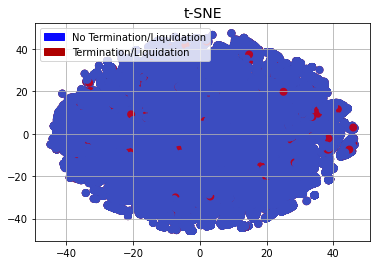

In [11]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Termination/Liquidation')
red_patch = mpatches.Patch(color='#AF0000', label='Termination/Liquidation')


# t-SNE scatter plot
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y1 == 0), cmap='coolwarm', label='No Termination/Liquidation', linewidths=2)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y1 == 1), cmap='coolwarm', label='Termination/Liquidation', linewidths=2)
plt.title('t-SNE', fontsize=14)

plt.grid(True)

plt.legend(handles=[blue_patch, red_patch])
plt.show()

In [14]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

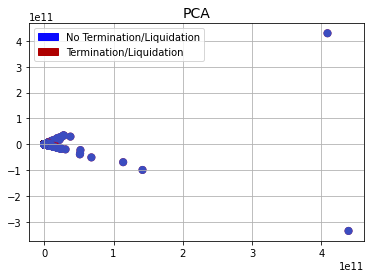

In [16]:
# PCA scatter plot
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y1 == 0), cmap='coolwarm', label='No Termination/Liquidation', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y1 == 1), cmap='coolwarm', label='Termination/Liquidation', linewidths=2)
plt.title('PCA', fontsize=14)

plt.grid(True)

plt.legend(handles=[blue_patch, red_patch])
plt.show()

# Pre-processing
* Apply nomalization to the whole dataset
* Split train, validation, and test sets
* Use resampling method

In [10]:
# transfer to log df
numeric_df = X.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df = numeric_df.replace(0,1)
numeric_df[np.isfinite(numeric_df)==0]=0
numeric_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,unrelbusinccd,initiationfees,grsrcptspublicuse,grsincmembers,grsincother,totcntrbgfts,totprgmrevnue,invstmntinc,txexmptbndsproceeds,royaltsinc,...,nonpfreayr-1_5,nonpfreayr-1_6,nonpfreayr-1_7,nonpfreayr-1_8,nonpfreayr-1_9,nonpfreayr-1_11,nonpfreayr-1_12,nonpfreayr-1_13,nonpfreayr-1_14,nonpfreayr-1_15
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,6.703293,5.186911,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.000000,0.000000,0.0,0.0,6.294340,6.774271,4.483887,0.0,4.683299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.000000,0.000000,0.0,0.0,0.000000,5.529430,1.913814,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,6.051747,5.339859,0.0,0.0,0.000000,6.483899,4.277128,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,1.0,0.000000,0.000000,0.0,0.0,6.930669,6.842122,3.616476,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# normalize
scaler = StandardScaler()
inputX = scaler.fit_transform(X)

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(inputX, y1, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182544, 541), (45637, 541), (182544,), (45637,))

In [13]:
# Train-train, train-test split
X_input, X_val, y_input, y_val = train_test_split(X_train, y_train, test_size=0.2)

Choosing either downsample or upsample
* downsample: 6362 rows, takes less time to train
* upsample: 287986 rows, more samples to train

In [21]:
# # using log df 
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X_over, y1_over = undersample.fit_resample(X_input,y_input)

In [14]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y1_over = oversample.fit_resample(X_input, y_input)

In [15]:
X_over.shape

(288100, 541)

In [16]:
y1_over.shape

(288100,)

# Plotting Functions

In [17]:
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
def plot_the_accuracy(epochs, accuracy, val_accuracy):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.plot(epochs, accuracy, 'o-', label='train')
  plt.plot(epochs, val_accuracy, 'o-', label='validation')
  plt.legend()
  plt.ylim([accuracy.min()*0.97, accuracy.max()])
  plt.show()

In [19]:
def plot_the_model(label, prediction):
  plt.xlabel("label")
  plt.ylabel("prediction")
  plt.scatter(label, prediction)
  x0 = 0
  x1 = np.minimum(label.max(),prediction.max())
  plt.show()

In [20]:
def plot_the_prob(model, features, labels):
    prediction=pd.DataFrame(model.predict(features))
    plt.figure(figsize=(10,8))
    plt.hist(prediction[labels==0], bins=50, label='Negatives')
    plt.hist(prediction[labels==1], bins=50, label='Positives', alpha=0.6, color='r')
    plt.xlabel('Probability of being Positive Class')
    plt.ylabel('Number of records in each bucket')
    plt.legend()
    plt.show()

In [21]:
def plot_the_prob_1(model, features, labels):
    prediction=pd.DataFrame(model.predict(features)[:,1])
    plt.figure(figsize=(10,8))
    plt.hist(prediction[labels==0], bins=50, label='Negatives')
    plt.hist(prediction[labels==1], bins=50, label='Positives', alpha=0.6, color='r')
    plt.xlabel('Probability of being Positive Class')
    plt.ylabel('Number of records in each bucket')
    plt.legend()
    plt.show()

In [22]:
def plot_the_loss(epochs, loss, val_loss):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.legend()
  plt.ylim([loss.min()*0.97, loss.max()])
  plt.show()

# Model Baseline
**Downsample baselines**
* Logistic regression
    * validation set accuracy: 0.63
    * validation set AUC: 0.63
* Random forest
    * validation set accuracy: 0.63
    * validation set AUC: 0.63
    
**Upsample baselines**
* Logistic regression
    * validation set accuracy: 0.69
    * validation set AUC: 0.69
* Random forest
    * validation set accuracy: 0.99
    * validation set AUC: 0.99
    
The Random Forest model already has a 99% accuracy.

In [18]:
# # downsampled - logistic baseline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, roc_curve, roc_auc_score, recall_score
# clf = LogisticRegression()
# clf.fit(X_over, y1_over)
# pred = clf.predict(X_val)
# pred_train = clf.predict(X_over)
# acc = accuracy_score(y_val, pred)
# acc_train = accuracy_score(y1_over, pred_train)
# auc = roc_auc_score(y_val, pred)
# auc_train = roc_auc_score(y1_over, pred_train)

# col = []
# algo = pd.DataFrame(columns = col)
# algo.loc[0, 'Algorithm'] = 'Logistic Regression'
# algo.loc[0, 'Accuracy_train'] = acc_train
# algo.loc[0, 'Accuracy_test'] = acc
# algo.loc[0, 'AUC Score_train'] = auc_train
# algo.loc[0, 'AUC Score_test'] = auc

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
# # downsampled - random forest baseline
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# clf.fit(X_over, y1_over)
# pred = clf.predict(X_val)
# pred_train = clf.predict(X_over)
# acc = accuracy_score(y_val, pred)
# acc_train = accuracy_score(y1_over, pred_train)
# auc = roc_auc_score(y_val, pred)
# auc_train = roc_auc_score(y1_over, pred_train)

# algo.loc[1, 'Algorithm'] = 'Random Forest'
# algo.loc[1, 'Accuracy_train'] = acc_train
# algo.loc[1, 'Accuracy_test'] = acc
# algo.loc[1, 'AUC Score_train'] = auc_train
# algo.loc[1, 'AUC Score_test'] = auc
# algo

,Algorithm,Accuracy_train,Accuracy_test,AUC Score_train,AUC Score_test
0,Logistic Regression,0.694015,0.682407,0.694015,0.643308
1,Random Forest,1.000000,0.705223,1.000000,0.664285


In [80]:
# upsampled - logistic baseline
clf = LogisticRegression()
clf.fit(X_over, y1_over)
pred = clf.predict(X_val)
pred_train = clf.predict(X_over)
acc = accuracy_score(y_val, pred)
acc_train = accuracy_score(y1_over, pred_train)
auc = roc_auc_score(y_val, pred)
auc_train = roc_auc_score(y1_over, pred_train)

col = []
algo = pd.DataFrame(columns = col)
algo.loc[0, 'Algorithm'] = 'Logistic Regression'
algo.loc[0, 'Accuracy_train'] = acc_train
algo.loc[0, 'Accuracy_test'] = acc
algo.loc[0, 'AUC Score_train'] = auc_train
algo.loc[0, 'AUC Score_test'] = auc

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[32476 12504]
 [  316   341]]


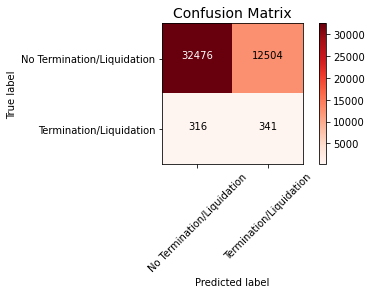

In [81]:
undersample_cm = confusion_matrix(y_test, clf.predict(X_test))
labels = ['No Termination/Liquidation', 'Termination/Liquidation']
plot_confusion_matrix(undersample_cm, labels, title="Confusion Matrix", cmap=plt.cm.Reds)

In [30]:
# upsampled - random forest baseline
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_over, y1_over)
pred = clf.predict(X_val)
pred_train = clf.predict(X_over)
acc = accuracy_score(y_val, pred)
acc_train = accuracy_score(y1_over, pred_train)
auc = roc_auc_score(y_val, pred)
auc_train = roc_auc_score(y1_over, pred_train)

algo.loc[1, 'Algorithm'] = 'Random Forest'
algo.loc[1, 'Accuracy_train'] = acc_train
algo.loc[1, 'Accuracy_test'] = acc
algo.loc[1, 'AUC Score_train'] = auc_train
algo.loc[1, 'AUC Score_test'] = auc
algo

,Algorithm,Accuracy_train,Accuracy_test,AUC Score_train,AUC Score_test
0,Logistic Regression,0.677355,0.720069,0.677355,0.642294
1,Random Forest,1.000000,0.985127,1.000000,0.503599


[[44977     3]
 [  654     3]]


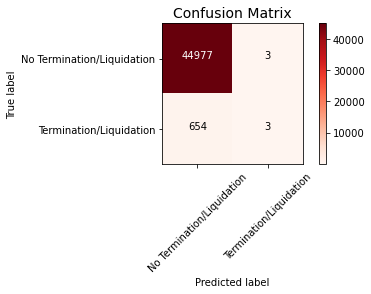

In [34]:
undersample_cm = confusion_matrix(y_test, clf.predict(X_test))
labels = ['No Termination/Liquidation', 'Termination/Liquidation']
plot_confusion_matrix(undersample_cm, labels, title="Confusion Matrix", cmap=plt.cm.Reds)

In [32]:
y_test.value_counts()

0    44980
1      657
Name: y_TL, dtype: int64

# Fully connected Neural Network

In [256]:
class_weight = {0: 1.,
                1: 73.}

In [82]:
# fully connected nn

def build_model(learning_rate, sizes):
    model = tf.keras.models.Sequential()
    for s in sizes:
        model.add(tf.keras.layers.Dense(units=s, activation="relu", kernel_regularizer='l2'))
        model.add(tf.keras.layers.Dropout(.1))    
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy', tf.keras.metrics.AUC()])

    return model


def train_model(model, feature, label, val_feature, val_label, epochs, batch_size):#, class_weight):
  es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)
  history = model.fit(x=feature,
                      y=label,
                      validation_data=(val_feature, val_label),
                      callbacks=[es],
                      batch_size=batch_size,
                      epochs=epochs)#,
                     #class_weight=class_weight)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  accuracy = hist["accuracy"]
  val_accuracy = hist['val_accuracy']
  return trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist

In [83]:
# fit model - 2 hidden layers
learning_rate=0.0005
epochs= 300
my_batch_size=500
hidden_sizes = [20,20]
NN_2HL = build_model(learning_rate, hidden_sizes)
trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist = train_model(NN_2HL, X_over, y1_over, X_val, y_val, epochs, my_batch_size)#, class_weight)

Epoch 1/300
577/577 [==============================] - 3s 4ms/step - loss: 0.7945 - accuracy: 0.6528 - auc_1: 0.7085 - val_loss: 0.6431 - val_accuracy: 0.7337 - val_auc_1: 0.6850
Epoch 2/300
577/577 [==============================] - 2s 3ms/step - loss: 0.6226 - accuracy: 0.6953 - auc_1: 0.7615 - val_loss: 0.5967 - val_accuracy: 0.7430 - val_auc_1: 0.6735
Epoch 3/300
577/577 [==============================] - 2s 3ms/step - loss: 0.5923 - accuracy: 0.7216 - auc_1: 0.7969 - val_loss: 0.5940 - val_accuracy: 0.7446 - val_auc_1: 0.6597
Epoch 4/300
577/577 [==============================] - 2s 3ms/step - loss: 0.5713 - accuracy: 0.7432 - auc_1: 0.8233 - val_loss: 0.5579 - val_accuracy: 0.7781 - val_auc_1: 0.6532
Epoch 5/300
577/577 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7588 - auc_1: 0.8410 - val_loss: 0.5394 - val_accuracy: 0.7907 - val_auc_1: 0.6441
Epoch 6/300
577/577 [==============================] - 2s 3ms/step - loss: 0.5407 - accuracy: 0.7687 - au

In [84]:
NN_2HL.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                10840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


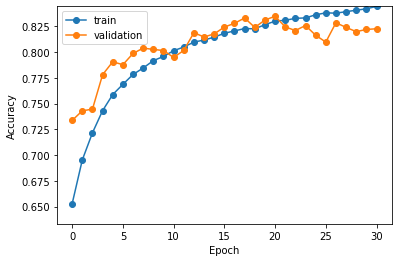

In [85]:
plot_the_accuracy(epochs, accuracy, val_accuracy)

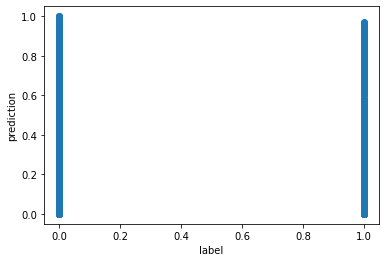

In [86]:
plot_the_model(y_test, NN_2HL.predict(X_test))

In [98]:
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

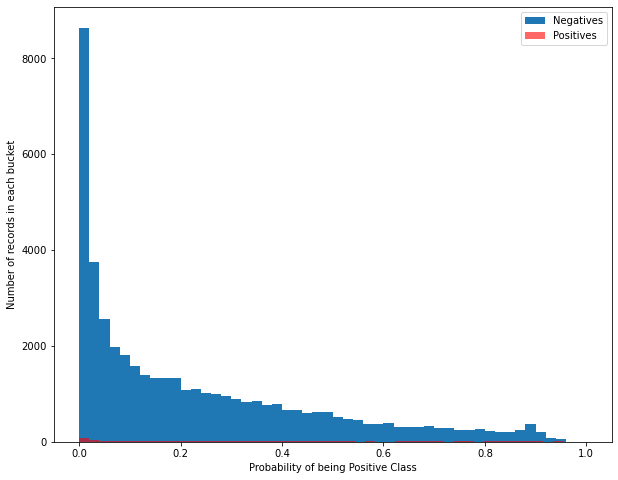

In [110]:
plot_the_prob(NN_2HL, X_test, y_test)

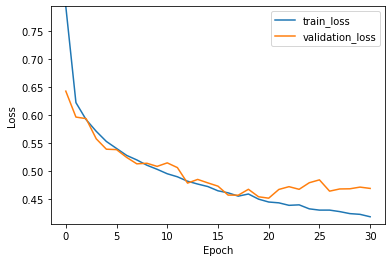

In [89]:
plot_the_loss(epochs, hist['loss'], hist['val_loss'])

[[44980     0]
 [  657     0]]


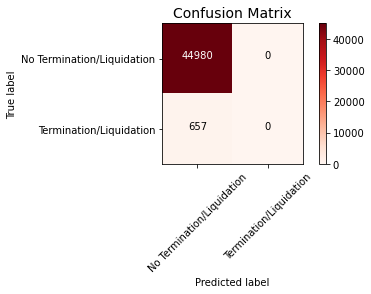

In [90]:
predict_x = NN_2HL.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)
undersample_cm = confusion_matrix(y_test, classes_x)
labels = ['No Termination/Liquidation', 'Termination/Liquidation']
plot_confusion_matrix(undersample_cm, labels, title="Confusion Matrix", cmap=plt.cm.Reds)

In [91]:
# evaluate on test set
NN_2HL.evaluate(X_test, y_test)

1427/1427 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8412 - auc_1: 0.6185


[0.43780434131622314, 0.8412033915519714, 0.6184842586517334]

In [138]:
# # predict probability
# def build_model(learning_rate, sizes):
#     model = tf.keras.models.Sequential()
#     for s in sizes:
#         model.add(tf.keras.layers.Dense(units=s, activation="relu", kernel_regularizer='l2'))
#         model.add(tf.keras.layers.Dropout(.2))    
#     model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                 metrics=['accuracy'])

#     return model


# def train_model(model, feature, label, val_feature, val_label, epochs, batch_size):
#   es = EarlyStopping(monitor='val_accuracy', 
#                                    mode='max', 
#                                    patience=10,
#                                    restore_best_weights=True)
#   history = model.fit(x=feature,
#                       y=label,
#                       validation_data=(val_feature, val_label),
#                       callbacks=[es],
#                       batch_size=batch_size,
#                       epochs=epochs)

#   trained_weight = model.get_weights()[0]
#   trained_bias = model.get_weights()[1]

#   epochs = history.epoch
#   hist = pd.DataFrame(history.history)
#   accuracy = hist["accuracy"]
#   val_accuracy = hist['val_accuracy']
#   return trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist

In [111]:
# predict probability
def build_model(learning_rate, sizes):
    model = tf.keras.models.Sequential()
    for s in sizes:
        model.add(tf.keras.layers.Dense(units=s, activation="relu", kernel_regularizer='l1'))
    #model.add(tf.keras.layers.Dropout(.1))    
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


def train_model(model, feature, label, val_feature, val_label, epochs, batch_size):
  es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)
  history = model.fit(x=feature,
                      y=label,
                      validation_data=(val_feature, val_label),
                      callbacks=[es],
                      batch_size=batch_size,
                      epochs=epochs,
                     shuffle=True)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  accuracy = hist["accuracy"]
  val_accuracy = hist['val_accuracy']
  return trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist

In [112]:
# y1_over = np.asarray(y1_over).astype('float32').reshape((-1,1))
# y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

In [113]:
learning_rate=0.0001
epochs=100
my_batch_size=3000
hidden_sizes = [30, 30]
NN_2HL_prob = build_model(learning_rate, hidden_sizes)
trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist = train_model(NN_2HL_prob, X_over, y1_over, X_val, y_val, epochs, my_batch_size)

Epoch 1/100
97/97 [==============================] - 1s 7ms/step - loss: 9.6488 - accuracy: 0.4930 - val_loss: 8.9049 - val_accuracy: 0.4285
Epoch 2/100
97/97 [==============================] - 0s 5ms/step - loss: 8.1410 - accuracy: 0.5271 - val_loss: 7.4594 - val_accuracy: 0.5135
Epoch 3/100
97/97 [==============================] - 0s 5ms/step - loss: 6.7853 - accuracy: 0.5524 - val_loss: 6.1725 - val_accuracy: 0.5989
Epoch 4/100
97/97 [==============================] - 0s 5ms/step - loss: 5.5809 - accuracy: 0.5743 - val_loss: 5.0412 - val_accuracy: 0.6704
Epoch 5/100
97/97 [==============================] - 0s 5ms/step - loss: 4.5287 - accuracy: 0.5914 - val_loss: 4.0645 - val_accuracy: 0.7216
Epoch 6/100
97/97 [==============================] - 0s 5ms/step - loss: 3.6273 - accuracy: 0.6016 - val_loss: 3.2359 - val_accuracy: 0.7564
Epoch 7/100
97/97 [==============================] - 0s 5ms/step - loss: 2.8763 - accuracy: 0.6096 - val_loss: 2.5533 - val_accuracy: 0.7727
Epoch 8/100
9

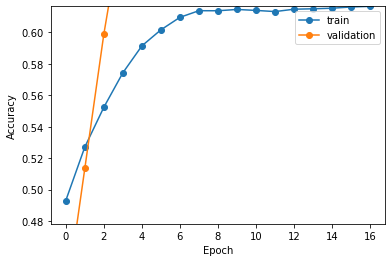

In [114]:
plot_the_accuracy(epochs, accuracy, val_accuracy)

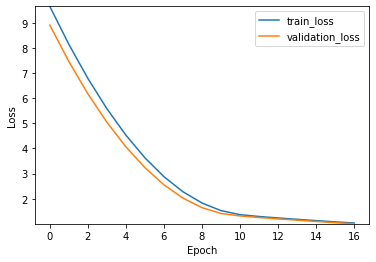

In [115]:
plot_the_loss(epochs, hist['loss'], hist['val_loss'])

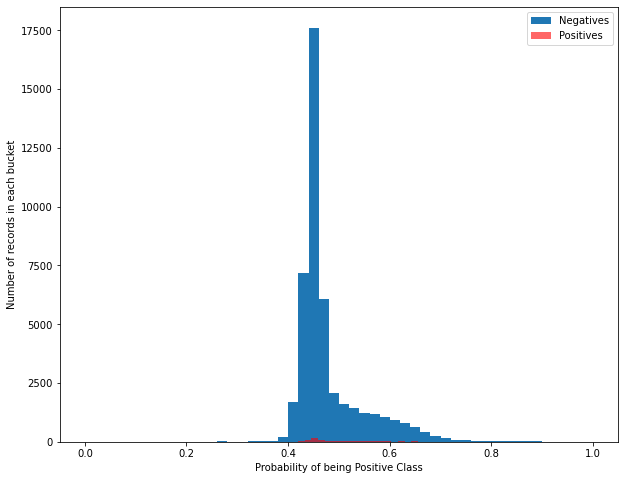

In [116]:
plot_the_prob_1(NN_2HL_prob, X_test, y_test)

[[34893 10087]
 [  380   277]]


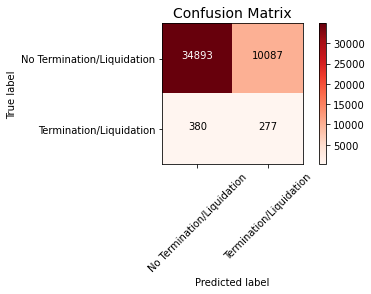

In [117]:
predict_x = NN_2HL_prob.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)
undersample_cm = confusion_matrix(y_test, classes_x)
labels = ['No Termination/Liquidation', 'Termination/Liquidation']
plot_confusion_matrix(undersample_cm, labels, title="Confusion Matrix", cmap=plt.cm.Reds)

In [118]:
# evaluate on test set
NN_2HL_prob.evaluate(X_test, y_test)

1427/1427 [==============================] - 2s 1ms/step - loss: 2.5539 - accuracy: 0.7706


[2.5538864135742188, 0.7706466317176819]

In [119]:
# predict probability
def build_model(learning_rate, sizes):
    model = tf.keras.models.Sequential()
    for s in sizes:
        model.add(tf.keras.layers.Dense(units=s, activation="relu", kernel_regularizer='l2'))
    #model.add(tf.keras.layers.Dropout(.2))    
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model


def train_model(model, feature, label, val_feature, val_label, epochs, batch_size):
  es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)
  history = model.fit(x=feature,
                      y=label,
                      validation_data=(val_feature, val_label),
                      callbacks=[es],
                      batch_size=batch_size,
                      epochs=epochs,
                     shuffle=True)

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  accuracy = hist["accuracy"]
  val_accuracy = hist['val_accuracy']
  return trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist

In [120]:
# fit model - 3 hidden layers
learning_rate=0.0001
epochs=300
my_batch_size=3000
hidden_sizes = [10, 20, 20]
NN_3HL = build_model(learning_rate, hidden_sizes)
trained_weight, trained_bias, epochs, accuracy, val_accuracy, hist = train_model(NN_3HL, X_over, y1_over, X_val, y_val, epochs, my_batch_size)

Epoch 1/300
97/97 [==============================] - 1s 7ms/step - loss: 1.1920 - accuracy: 0.5414 - val_loss: 1.1726 - val_accuracy: 0.5383
Epoch 2/300
97/97 [==============================] - 0s 4ms/step - loss: 1.1221 - accuracy: 0.5918 - val_loss: 1.1098 - val_accuracy: 0.6736
Epoch 3/300
97/97 [==============================] - 0s 5ms/step - loss: 1.0620 - accuracy: 0.6160 - val_loss: 1.0493 - val_accuracy: 0.7376
Epoch 4/300
97/97 [==============================] - 0s 5ms/step - loss: 1.0107 - accuracy: 0.6271 - val_loss: 0.9988 - val_accuracy: 0.7580
Epoch 5/300
97/97 [==============================] - 0s 5ms/step - loss: 0.9672 - accuracy: 0.6346 - val_loss: 0.9536 - val_accuracy: 0.7692
Epoch 6/300
97/97 [==============================] - 0s 5ms/step - loss: 0.9297 - accuracy: 0.6434 - val_loss: 0.9174 - val_accuracy: 0.7673
Epoch 7/300
97/97 [==============================] - 0s 5ms/step - loss: 0.8972 - accuracy: 0.6509 - val_loss: 0.8835 - val_accuracy: 0.7627
Epoch 8/300
9

In [76]:
NN_3HL.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                5420      
_________________________________________________________________
dense_23 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 42        
Total params: 6,102
Trainable params: 6,102
Non-trainable params: 0
_________________________________________________________________


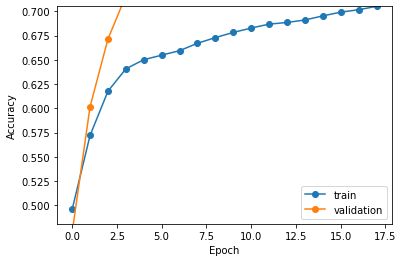

In [77]:
plot_the_accuracy(epochs, accuracy, val_accuracy)

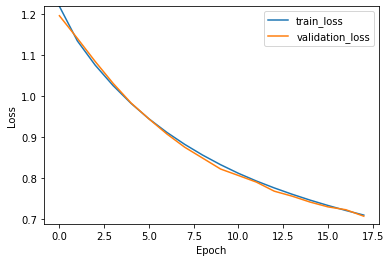

In [78]:
plot_the_loss(epochs, hist['loss'], hist['val_loss'])

[[34644 10336]
 [  354   303]]


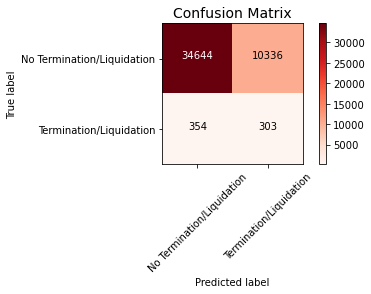

In [122]:
predict_x = NN_3HL.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)
undersample_cm = confusion_matrix(y_test, classes_x)
labels = ['No Termination/Liquidation', 'Termination/Liquidation']
plot_confusion_matrix(undersample_cm, labels, title="Confusion Matrix", cmap=plt.cm.Reds)

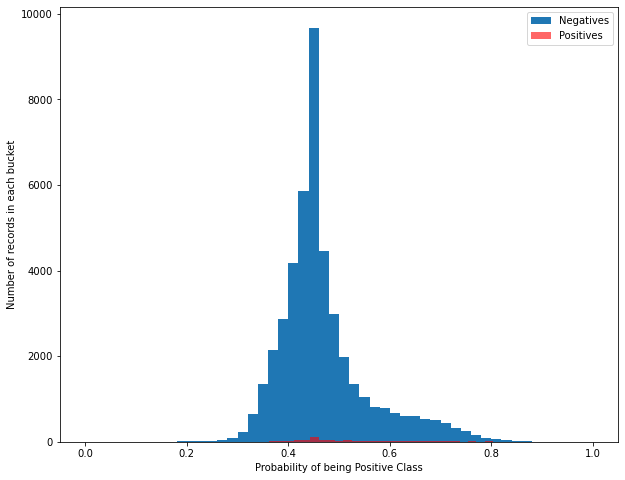

In [121]:
plot_the_prob_1(NN_3HL, X_test, y_test)

In [64]:
# evaluate on test set
NN_3HL.evaluate(X_test, y_test)

1427/1427 [==============================] - 2s 1ms/step - loss: 0.5197 - accuracy: 0.8278


[0.5196577310562134, 0.8277713060379028]